<a href="https://colab.research.google.com/github/dragoa/AI/blob/main/Ml/01/02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import numpy.matlib as nml
import matplotlib.pyplot as plt

In [2]:
np.random.seed(11)

In [3]:
# Oracle for generating our dataset
def oracle(x):
  #return x
  return x**2
  #return np.sinc(3*x)

In [4]:
n = 100 # number of samples
d = 1 # number of dimensions
sigma = .01 # power of the noise

In [5]:
x = np.random.rand(n) # generating random values
X = np.asarray(np.asmatrix(x).transpose()) # data in matricial form
y = oracle(x) + sigma*np.random.randn(n) # labels

In [6]:
# generating data for our plot
ns = 1000
xs = np.linspace(0,1,ns)
Xs = np.asarray(np.asmatrix(xs).transpose())

In [18]:
lam = .01 # hyperparameter for evaluating complexity
gam = 10 # hyperparameter for evaluating non linearity

In [19]:
from sklearn.kernel_ridge import KernelRidge

M = KernelRidge(alpha=lam, kernel='rbf', gamma=gam) # using gaussian kernel
M.fit(X,y) # training
ys = M.predict(Xs) # prediction

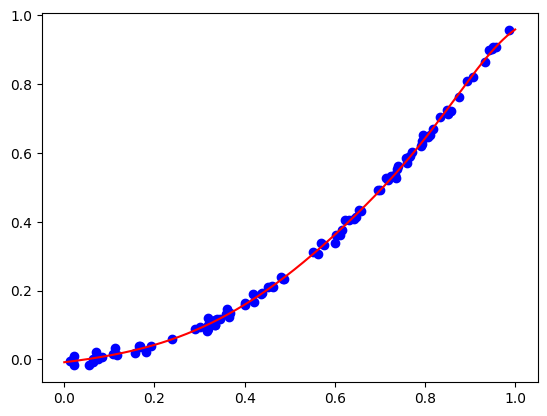

In [20]:
fig, ax = plt.subplots()
ax.plot(X,y,'bo')
ax.plot(Xs,ys,'r')

In [21]:
from sklearn.model_selection import GridSearchCV

"""
We want to find which are the best hyperparameters. We use the model selecrion library
"""
# grid of values that we are searching
grid = {'alpha'  : np.logspace(-4,3,30),
        'kernel' : ['rbf'],
        'gamma'  : np.logspace(-4,3,30)}

# what we want to minimize
MS = GridSearchCV(estimator = KernelRidge(),
                  param_grid = grid,
                  scoring = 'neg_mean_absolute_error',
                  cv = 10)

# I apply the model selection on my data
H = MS.fit(X,y)
# I put the best hyperparameters that I found
M = KernelRidge(alpha = H.best_params_['alpha'],
                kernel = H.best_params_['kernel'],
                gamma = H.best_params_['gamma'])
# I retrain my model
M.fit(X,y)
# Final prediction
ys = M.predict(Xs)

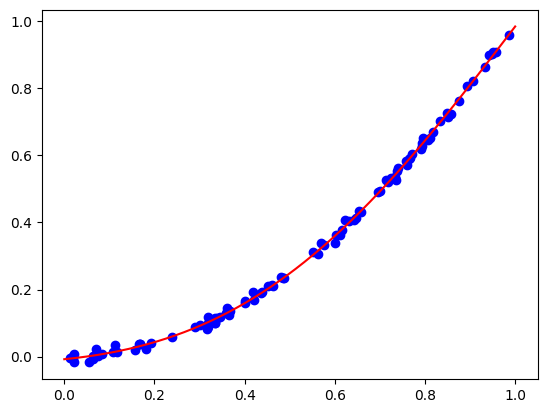

In [22]:
fig, ax = plt.subplots()
ax.plot(X,y,'bo')
ax.plot(Xs,ys,'r')